# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models.

# Importing packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Load the dataset into data


In [3]:
data = pd.read_csv("supermarket_survey.csv", delimiter=';')

# Dataset overview and statistical summary


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   randomInt                353 non-null    int64  
 1   age                      345 non-null    object 
 2   gender                   347 non-null    object 
 3   district                 334 non-null    object 
 4   modeOfTransportation     341 non-null    object 
 5   distance                 338 non-null    object 
 6   G03Q13amountOfPeople     345 non-null    object 
 7   income                   331 non-null    float64
 8   frequency                339 non-null    object 
 9   days[1]                  353 non-null    object 
 10  days[2]                  353 non-null    object 
 11  days[3]                  353 non-null    object 
 12  days[4]                  353 non-null    object 
 13  days[5]                  353 non-null    object 
 14  days[6]                  3

In [5]:
data.describe()

,randomInt,income,satisGeneralStore,satisMusic,satisQualityProducts,satisGeneralAssortment,satisVeganProducts,satisOrganicProducts,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
count,353.000000,331.000000,332.000000,288.000000,329.000000,330.000000,274.000000,301.000000,209.000000,307.000000,324.000000,322.000000,318.000000,324.000000,320.000000,323.000000,312.000000,300.000000
mean,2.609065,66275.568882,7.424699,5.236111,7.498480,7.278788,6.350365,6.767442,6.315789,7.348534,6.919753,3.711180,3.232704,6.410494,5.571875,7.857585,7.602564,5.396667
std,1.105322,132542.950482,1.705790,2.507094,1.479792,1.674366,2.177444,1.981347,2.269317,1.902618,3.129760,3.027465,2.668179,3.147757,3.197936,2.668804,2.752793,3.321057
min,1.000000,-99932.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2290.000000,7.000000,3.000000,7.000000,7.000000,5.000000,6.000000,5.000000,6.500000,5.000000,1.000000,1.000000,4.000000,3.000000,7.000000,6.000000,2.000000
50%,3.000000,21000.000000,8.000000,5.000000,8.000000,8.000000,7.000000,7.000000,6.000000,8.000000,8.000000,2.000000,2.000000,7.000000,6.000000,9.000000,8.000000,6.000000
75%,4.000000,80284.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,10.000000,6.000000,5.000000,9.000000,9.000000,10.000000,10.000000,8.000000
max,4.000000,999999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
data.head()

,randomInt,age,gender,district,modeOfTransportation,distance,G03Q13amountOfPeople,income,frequency,days[1],...,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
0,4,NaN,Male,Godham,Own Car,1-2km,3,120000.0,Twice,No,...,8.0,7.0,2.0,4.0,3.0,4.0,NaN,4.0,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20-25,Female,Springtown,Own Car,>7km,2,15.0,Three times,No,...,7.0,NaN,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,1337.0,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,15-20,Male,Piltunder,Own Car,1-2km,4,250000.0,Twice,No,...,8.0,1.0,9.0,2.0,1.0,10.0,10.0,10.0,8.0,NaN


# Data cleaning

In [7]:
data.isnull().sum()

randomInt                    0
age                          8
gender                       6
district                    19
modeOfTransportation        12
distance                    15
G03Q13amountOfPeople         8
income                      22
frequency                   14
days[1]                      0
days[2]                      0
days[3]                      0
days[4]                      0
days[5]                      0
days[6]                      0
days[7]                      0
time[1]                      0
time[2]                      0
time[3]                      0
time[4]                      0
time[5]                      0
moneySpent                  15
orderingItems               19
deliveringItems             20
willingPayDelivery         187
findProducts                19
usingDiscounts              27
preferCash                  22
preferCashless              24
isRelaxing                  26
satisGeneralStore           21
satisMusic                  65
satisQua

In [8]:
# There are 45 columns -- but do we really need that much ? 
# Here is the data that we will need for our analysis

# age
# gender
# district
# modeOfTransportation
# distance
# income
# frequency
# moneySpent -- y
# orderingItems -- y
# deliveringItems 
# usingDiscounts
# preferCash -- y
# preferCashless -- y
# satisGeneralStore -- y
# satisQualityProducts 
# satisVeganProducts 
# satisOrganicProducts
# satisGlutenfreeProducts
# satisAnimalProducts

# notice the sign "-- y", we will discuss about that in later phrase

In [9]:
# getting all the required data
data = data[['age', 'gender', 'district', 'modeOfTransportation', 'distance', 'income', 'frequency', 'moneySpent', 'orderingItems', 'deliveringItems', 'usingDiscounts', 'preferCash', 'preferCashless', 'satisGeneralStore', 'satisQualityProducts', 'satisVeganProducts', 'satisOrganicProducts', 'satisGlutenfreeProducts','satisAnimalProducts']]

In [10]:
data.isnull().sum()

age                          8
gender                       6
district                    19
modeOfTransportation        12
distance                    15
income                      22
frequency                   14
moneySpent                  15
orderingItems               19
deliveringItems             20
usingDiscounts              27
preferCash                  22
preferCashless              24
satisGeneralStore           21
satisQualityProducts        24
satisVeganProducts          79
satisOrganicProducts        52
satisGlutenfreeProducts    144
satisAnimalProducts         46
dtype: int64

In [11]:
# lets get the unique list in string form
# finding unique's in columns
def unique_cols(): 
    print('\nGender: ', data['gender'].unique())
    print('\nDistrict: ', data['district'].unique())
    print('\nDistance: ', data['distance'].unique())
    print('\nMode of Transportation: ',data['modeOfTransportation'].unique())
    print('\nFrequency: ', data['frequency'].unique())
    print('\nMoney spent: ', data['moneySpent'].unique())
    print('\nOrdering Items: ', data['orderingItems'].unique())
    print('\nDelievering Items: ', data['deliveringItems'].unique())
    
unique_cols()


Gender:  ['Male' nan 'Female' 'Prefer not to say' 'Diverse']

District:  ['Godham' nan 'Springtown' 'Piltunder' 'Metrapalis' 'Duckborg']

Distance:  ['1-2km' nan '>7km' '500 meters to 1km' '3-5km' '5-7km'
 'Less than few hundred meters']

Mode of Transportation:  ['Own Car' nan 'Walking' 'Bicycle' 'Taxi' 'Rented car (“car sharing”)'
 'Public transportation']

Frequency:  ['Twice' nan 'Three times' 'Once' 'Four times' 'More than four times']

Money spent:  ['Between 75 and 100 USD' nan 'Between 50 and 75' 'Less than 25 USD'
 '100 to 125 USD' 'Between 25 and 50 USD' 'More than 125 USD']

Ordering Items:  ['… ordering online.' nan '…selecting them myself in the store.']

Delievering Items:  ['… get them directly delivered to my address.' nan
 '…get them myself in and from the store.'
 '… get them delivered to the store for me to pick-up.']


In [12]:
# we suppose that, we only need to fill null values only in District, Ordering Items, Delievering Items

In [13]:
# doing manual cleaning

# age
def calculate_average_age(row):
    if isinstance(row, str):
        if row.startswith('>'):
            return int(row[1:])
        lower, upper = map(int, row.split('-'))
        average = (lower + upper) / 2
        return math.ceil(average)
    else:
        return row

data['age'] = data['age'].apply(calculate_average_age)

In [14]:
# gender

# considering gender outputs like Prefer not to say and Diverse in Others category -- no offense or hate to anyone

data['gender'] = data['gender'].replace(['Prefer not to say', 'Diverse'],'Others')

In [15]:
# distance
data['distance'] = data['distance'].replace(['1-2km','2.0', '>7km', '500 meters to 1km', '3-5km', '5-7km', 'Less than few hundred meters'], [2,2,7,1,5,7,0.5])

In [16]:
# mode of transportation
data['modeOfTransportation'] = data['modeOfTransportation'].replace(['Rented car (“car sharing”)'], ['Rented Car'])

In [17]:
# frequency
data['frequency'] = data['frequency'].replace(['Twice', 'Three times', 'Once', 'Four times','More than four times'], [2,3,1,4,5])

In [18]:
# money spent
data['moneySpent'] = data['moneySpent'].replace(['Between 75 and 100 USD', 'Between 50 and 75', 'Less than 25 USD', '100 to 125 USD', 'Between 25 and 50 USD','More than 125 USD'], [100,75,25,125,50,125])

In [19]:
# string data type -- doing mode function
def valChange(colName):
    data[colName] = data[colName].fillna(data[colName].mode().iloc[0])

valChange('gender')
valChange('district')
valChange('modeOfTransportation')
valChange('orderingItems')
valChange('deliveringItems')
valChange('usingDiscounts')
valChange('preferCash')
valChange('preferCashless')

In [20]:
# numeric data type -- doing median function
def numChange(colName):
    data[colName] = data[colName].fillna(data[colName].median())

numChange('age')
numChange('distance')
numChange('income')
numChange('frequency')
numChange('moneySpent')
numChange('satisGeneralStore')
numChange('satisQualityProducts')
numChange('satisOrganicProducts')
numChange('satisVeganProducts')
numChange('satisGlutenfreeProducts')
numChange('satisAnimalProducts')

In [21]:
# now checking changes
# finding unique's in columns
unique_cols()


Gender:  ['Male' 'Female' 'Others']

District:  ['Godham' 'Springtown' 'Piltunder' 'Metrapalis' 'Duckborg']

Distance:  [2.  7.  1.  5.  0.5]

Mode of Transportation:  ['Own Car' 'Bicycle' 'Walking' 'Taxi' 'Rented Car' 'Public transportation']

Frequency:  [2. 3. 1. 4. 5.]

Money spent:  [100.  75.  25. 125.  50.]

Ordering Items:  ['… ordering online.' '…selecting them myself in the store.']

Delievering Items:  ['… get them directly delivered to my address.'
 '…get them myself in and from the store.'
 '… get them delivered to the store for me to pick-up.']


In [22]:
data.head()

,age,gender,district,modeOfTransportation,distance,income,frequency,moneySpent,orderingItems,deliveringItems,usingDiscounts,preferCash,preferCashless,satisGeneralStore,satisQualityProducts,satisVeganProducts,satisOrganicProducts,satisGlutenfreeProducts,satisAnimalProducts
0,38.0,Male,Godham,Own Car,2.0,120000.0,2.0,100.0,… ordering online.,… get them directly delivered to my address.,Rather disagree,Strongly disagree,Rather agree,4.0,4.0,2.0,8.0,8.0,7.0
1,38.0,Male,Springtown,Bicycle,2.0,21000.0,2.0,75.0,…selecting them myself in the store.,…get them myself in and from the store.,Rather agree,Strongly disagree,Strongly agree,8.0,8.0,7.0,7.0,6.0,8.0
2,23.0,Female,Springtown,Own Car,7.0,15.0,3.0,75.0,…selecting them myself in the store.,…get them myself in and from the store.,Rather agree,Strongly disagree,Strongly agree,8.0,7.0,7.0,7.0,7.0,8.0
3,38.0,Male,Springtown,Bicycle,2.0,1337.0,2.0,75.0,…selecting them myself in the store.,…get them myself in and from the store.,Rather agree,Strongly disagree,Strongly agree,8.0,8.0,7.0,7.0,6.0,8.0
4,18.0,Male,Piltunder,Own Car,2.0,250000.0,2.0,75.0,…selecting them myself in the store.,…get them myself in and from the store.,Rather agree,Rather disagree,Strongly agree,8.0,7.0,8.0,8.0,8.0,1.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      353 non-null    float64
 1   gender                   353 non-null    object 
 2   district                 353 non-null    object 
 3   modeOfTransportation     353 non-null    object 
 4   distance                 353 non-null    float64
 5   income                   353 non-null    float64
 6   frequency                353 non-null    float64
 7   moneySpent               353 non-null    float64
 8   orderingItems            353 non-null    object 
 9   deliveringItems          353 non-null    object 
 10  usingDiscounts           353 non-null    object 
 11  preferCash               353 non-null    object 
 12  preferCashless           353 non-null    object 
 13  satisGeneralStore        353 non-null    float64
 14  satisQualityProducts     3

# EDA

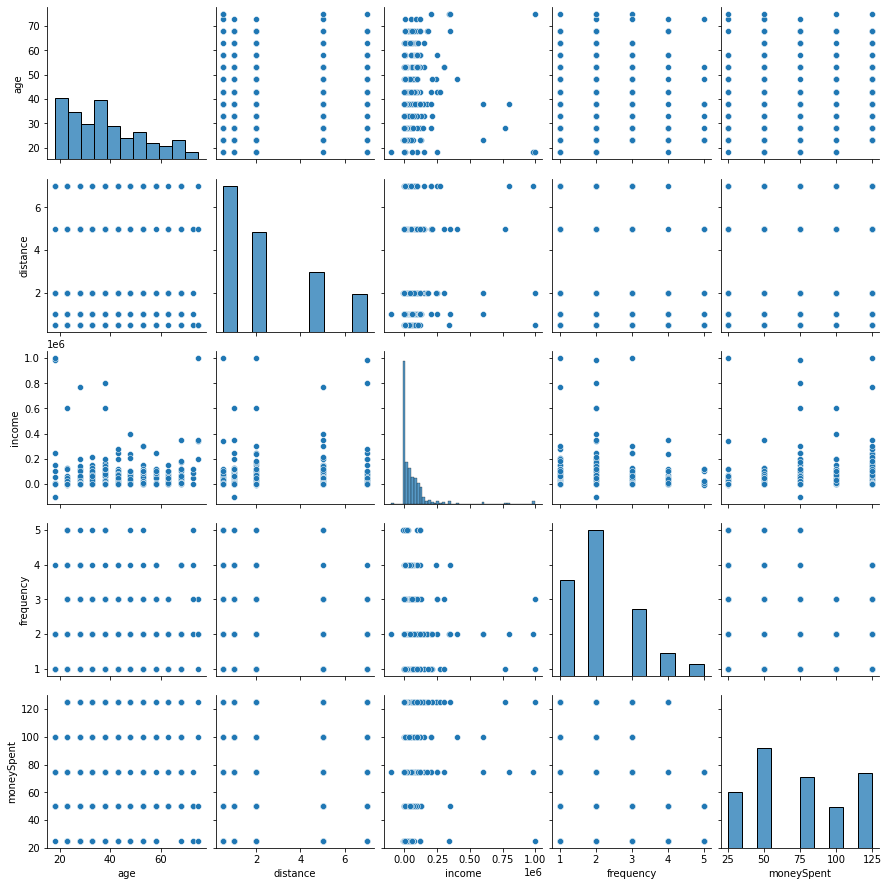

In [24]:
sns.pairplot(data[['age', 'distance', 'income','frequency', 'moneySpent']])

In [25]:
data.corr()

,age,distance,income,frequency,moneySpent,satisGeneralStore,satisQualityProducts,satisVeganProducts,satisOrganicProducts,satisGlutenfreeProducts,satisAnimalProducts
age,1.000000,0.132301,0.119989,-0.036081,0.191339,0.028356,-0.002794,-0.044946,-0.131003,-0.089568,-0.049384
distance,0.132301,1.000000,0.159086,-0.201215,0.279534,0.071000,0.065509,0.026608,0.009380,0.015791,0.129122
income,0.119989,0.159086,1.000000,-0.051165,0.198282,0.012640,0.029034,-0.019691,-0.053751,0.036320,0.023667
frequency,-0.036081,-0.201215,-0.051165,1.000000,-0.353857,-0.004845,0.020179,-0.133064,-0.086931,-0.070098,-0.096666
moneySpent,0.191339,0.279534,0.198282,-0.353857,1.000000,0.076840,0.023101,0.048848,0.068409,-0.014784,0.115160
satisGeneralStore,0.028356,0.071000,0.012640,-0.004845,0.076840,1.000000,0.644214,0.454009,0.428265,0.221575,0.445069
satisQualityProducts,-0.002794,0.065509,0.029034,0.020179,0.023101,0.644214,1.000000,0.375205,0.456884,0.340310,0.446103
satisVeganProducts,-0.044946,0.026608,-0.019691,-0.133064,0.048848,0.454009,0.375205,1.000000,0.567772,0.365422,0.220878
satisOrganicProducts,-0.131003,0.009380,-0.053751,-0.086931,0.068409,0.428265,0.456884,0.567772,1.000000,0.486447,0.306700
satisGlutenfreeProducts,-0.089568,0.015791,0.036320,-0.070098,-0.014784,0.221575,0.340310,0.365422,0.486447,1.000000,0.319793


<AxesSubplot:>

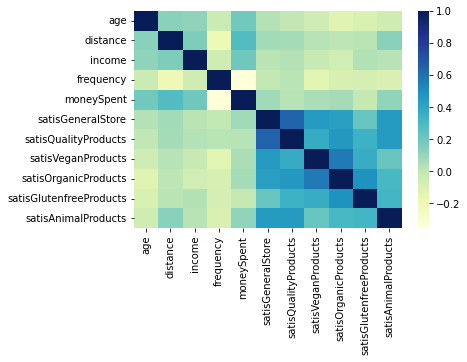

In [26]:
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), cmap="YlGnBu")

In [27]:
# Relation between age and moneySpent
data[['age', 'moneySpent']].groupby(['age'], as_index = False).mean()

,age,moneySpent
0,18.0,65.000000
1,23.0,55.660377
2,28.0,61.224490
3,33.0,79.729730
4,38.0,77.049180
5,43.0,86.764706
6,48.0,87.500000
7,53.0,81.250000
8,58.0,72.058824
9,63.0,76.785714


In [28]:
# Relation between age, income, moneySpent
data[['age', 'income', 'moneySpent']].groupby(['age', 'moneySpent']).count()

income
age  moneySpent        
18.0 25.0             1
     50.0             4
     75.0             3
     100.0            2
23.0 25.0            20
     50.0            17
     75.0             7
     100.0            2
     125.0            7
28.0 25.0            13
     50.0            17
     75.0             8
     100.0            6
     125.0            5
33.0 25.0             4
     50.0            10
     75.0             8
     100.0            5
     125.0           10
38.0 25.0             6
     50.0            17
     75.0            19
     100.0            4
     125.0           15
43.0 25.0             3
     50.0             7
     75.0             7
     100.0            5
     125.0           12
48.0 25.0             3
     50.0             5
     75.0             1
     100.0            4
     125.0            9
53.0 25.0             3
     50.0             7
     75.0             7
     100.0            2
     125.0            9
58.0 25.0             2
     50.0             7
     75.0             1
     100.0            5
     125.0            2
63.0 50.0             6
     75.0             4
     100.0            1
     125.0            3
68.0 25.0             1
     50.0             3
     75.0             7
     100.0            5
     125.0            4
73.0 25.0             1
     50.0             2
     75.0             1
75.0 25.0             1
     50.0             1
     100.0            1
     125.0            1

In [29]:
# correlation values between pclass, survival, age
print('age w/t income:',data['age'].corr(data['income']))
print('age w/t moneySpent:',data['age'].corr(data['moneySpent']))
print('income w/t moneySpent:',data['income'].corr(data['moneySpent']))

age w/t income: 0.11998934244358012
age w/t moneySpent: 0.1913387598763577
income w/t moneySpent: 0.1982822005500373


# Data Processing and normalization

Applying Label Encoding to the categorical data – gender,district,modeOfTransportation,orderingItems,deliveringItems,usingDiscounts,preferCash,preferCashless

In [30]:
le = LabelEncoder()

def applyLE(colName):
    data[colName] = le.fit_transform(data[colName])

applyLE('gender')
applyLE('district')
applyLE('modeOfTransportation')
applyLE('orderingItems')
applyLE('deliveringItems')
applyLE('usingDiscounts')
applyLE('preferCash')
applyLE('preferCashless')

In [31]:
data.head(10)

,age,gender,district,modeOfTransportation,distance,income,frequency,moneySpent,orderingItems,deliveringItems,usingDiscounts,preferCash,preferCashless,satisGeneralStore,satisQualityProducts,satisVeganProducts,satisOrganicProducts,satisGlutenfreeProducts,satisAnimalProducts
0,38.0,1,1,1,2.0,120000.0,2.0,100.0,0,1,2,4,1,4.0,4.0,2.0,8.0,8.0,7.0
1,38.0,1,4,0,2.0,21000.0,2.0,75.0,1,2,1,4,3,8.0,8.0,7.0,7.0,6.0,8.0
2,23.0,0,4,1,7.0,15.0,3.0,75.0,1,2,1,4,3,8.0,7.0,7.0,7.0,7.0,8.0
3,38.0,1,4,0,2.0,1337.0,2.0,75.0,1,2,1,4,3,8.0,8.0,7.0,7.0,6.0,8.0
4,18.0,1,3,1,2.0,250000.0,2.0,75.0,1,2,1,2,3,8.0,7.0,8.0,8.0,8.0,1.0
5,23.0,2,2,5,1.0,500.0,2.0,25.0,1,2,3,4,3,7.0,9.0,6.0,7.0,10.0,10.0
6,63.0,1,1,1,2.0,5000.0,1.0,125.0,1,2,0,0,0,8.0,8.0,5.0,6.0,6.0,7.0
7,43.0,0,1,0,1.0,21000.0,2.0,50.0,1,2,4,0,0,8.0,9.0,7.0,7.0,6.0,7.0
8,28.0,1,2,5,1.0,600.0,4.0,25.0,1,2,2,4,3,8.0,7.0,6.0,6.0,6.0,8.0
9,23.0,0,4,0,1.0,1200.0,4.0,25.0,1,2,3,2,3,8.0,7.0,8.0,6.0,3.0,7.0


In [32]:
# remember those "--y" signs , I remarked earlier, they can be the value of y

In [33]:
X = data[['age','district','modeOfTransportation','distance','income','frequency']].values
y = data['moneySpent'].values

Test size can be different in scenarios - but here I've taken 0.3

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

Scaling the values, the scaling is used for making data points generalized so that the distance between them will be lower, this will help the machine.

In [35]:
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Creating ML model 1

In [36]:
regr = linear_model.LinearRegression()
regr.fit(X_train_scaled,y_train)

LinearRegression()

In [37]:
print(regr.coef_)

[  3.95148216  -1.31398446  -2.51895413   6.76845651   4.31928503
 -12.03906325]


## Prediction on Test data

In [38]:
y_pred_1 = regr.predict(X_test)

## Model 1 Performance

In [39]:
accuracy_score = round(regr.score(X_train_scaled, y_train) * 100, 2)
print("Model accuracy for training:", accuracy_score, "%")

Model accuracy for training: 26.59 %


In [40]:
accuracy_score = round(regr.score(X_test_scaled, y_test) * 100, 2)
print("Model accuracy for testing:", accuracy_score, "%")

Model accuracy for testing: 6.18 %


# Creating ML model 2

In [41]:
regr = linear_model.LogisticRegression()
regr.fit(X_train_scaled,y_train)

LogisticRegression()

In [42]:
print(regr.coef_)

[[-0.41769757 -0.00763657  0.28580581 -0.29563659 -0.36924122  0.68841193]
 [-0.05477075 -0.13850925  0.11476936 -0.14579297 -0.41256936  0.37039811]
 [ 0.06246955  0.35459052 -0.3102762  -0.05507704  0.24020486  0.09260001]
 [ 0.39942692 -0.01180072 -0.0895435   0.07269962  0.28385299 -0.46431066]
 [ 0.01057186 -0.19664398 -0.00075547  0.42380698  0.25775272 -0.68709939]]


## Prediction on Test data

In [43]:
y_pred_2 = regr.predict(X_test_scaled)

## ## Model 2 Performance

In [44]:
accuracy_score = round(regr.score(X_train_scaled, y_train) * 100, 2)
print("Model accuracy for training:", accuracy_score, "%")

Model accuracy for training: 42.91 %


In [45]:
accuracy_score = round(regr.score(X_test_scaled, y_test) * 100, 2)
print("Model accuracy for testing:", accuracy_score, "%")

Model accuracy for testing: 38.68 %


# Report and insight from your analysis

## Model and Dataset Analysis
- This is Regression Problem, based on the given data multivariate analysis would be applicable here.
- Dataset is not clean at the first insight. Cleaning dataset took up much time.
- We got too much unnecessary data which will not be useful for prediction.

## Dataset overview and statistical summary Analysis
- Using 19 columns for our EDA and further model prediction

## EDA Analysis
- Using Label Encoding for categorical values
- Correlation age w/t income: 0.11998934244358012
- Correlation age w/t moneySpent: 0.1913387598763577
- Correlation income w/t moneySpent: 0.1982822005500373

## Data Processing Analysis
- Linear Regression Accuracy: [Training: 26.59%, Testing: 6.18%]
- Logistic Regression Accuracy: [Training: 42.91%, Testing: 38.68%]